# Tutorial : Introdcution to Tensorflow and Keras 


---

**Prerequisites:** 
* Python
* Tensorflow 2.0

**Concepts Covered:** 
* Deep Learning
* Keras
* Sequential Model



**Hours Needed to Complete:** 2 hours

# Background

----


**For Students:** If you want to learn more than the machine learning, tensorflow will be a great tool for you to know. It is a primary software tool of deep learning, we can usemany open source artificial intelligence library and data flow graphs to build models. Tensorflow helps us to do classification, perception and prediction problems. For this lab, you will learn to how to import dataset from tensorflow and build the simple model with Keras to solve the image classification problem.

There are some areas that tensorflow was mostly used for:

* Image classification

* Text classification

* Video Detection

## Tutorial Walkthrough
----


#### **Step 1**
Import Package by the following code.

In [ ]:
import tensorflow as tf
from tensorflow import keras

#### **Step 2**
Import the dataset from keras MNMIST dataset.

* In tensorflow, there are a lot of useful real-life dataset for user to import instead of collecting the data by ourselives. For this lab, we will use fashion_mnist dataset which contains different dressing images. We have 9 categories: T-shirt/Top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, Ankle boot.

In [ ]:
#Use variable dressing to save the imported data
dressing = keras.datasets.fashion_mnist

#Extract the train and test images and their labels here.
(train_images, train_labels), (test_images, test_labels) = dressing.load_data()

In [ ]:
# We can see there are 60000 examples images for training data.
# Becasue the images are 28x28 pixels value arrays in range 0-255.
train_images.shape

In [ ]:
# Of course there are 60000 labels for training images.
train_labels.shape

In [ ]:
# There are 10000 dressing image examples as test data
test_images.shape

In [ ]:
# Run the cell to see what train_images data and label look like.
print(train_images[0])
print(train_labels[0])

#### **Step 3** 

Preprocess the data, in order to train the network later, we need to normalize the pixel values for images, the purpose of normalization is to accelerate the convergence of training network and ensure the small value in the data is not sawallowed.

In [ ]:
# Import the helper libraries to see the transform of images.
import numpy as np
import matplotlib.pyplot as plt

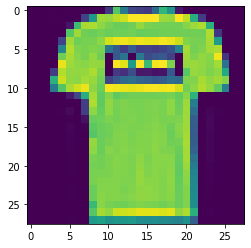

In [ ]:
# Lets see a example of image in the trainign set.
plt.figure()
plt.imshow(train_images[1])
plt.show()

In [ ]:
# Inorder to normalize the images pixel values, we scale values from 0-255 to 0-1.
train_images = train_images / 255.0
test_images = test_images / 255.0

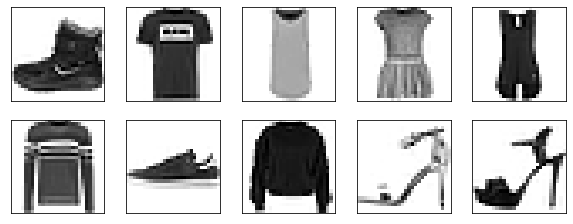

In [ ]:
# let's see the first 10 images examples after normalize the images.
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap=plt.cm.binary)
plt.show()

#### **Step 4** 
Build keras sequential model

* Firstly, we need to build the layers. Layers extract representations from the data fed into them. For this lab, we will use three simple layers to handle the input data:
  1.   Flatten Layer：transfer the images from 2-D array to 1-D array. The flaten layer helps unstacking the row of pixels and connect them toghter. It just reformates the data.
  2.   Dense Layer: we can build multiple dense layers here. Dense layer is the layer of neurons in a neural network. Each neuron recieves input from all the neurons in the previous layer, thus dense layers are connected. In this lab, we will use two dense layers with numer of neurons. The first layer will have **relu** activation function.

* There are several types of activation function for layers. In a neural network, activation function is responsible for transforming the summed weight input from the node into the activation of the node or output for that input.
 1.   **Sigmoid** exists between 0 to 1, it is sepcialy used for models where we have to predict the probality as an output.
 2.   **Tanh** mainly used classification between two classes.
 3.   **Relu** has advantages that it does not activate all the neurons at the same time, the neuron will not be activated if the output of linear transformation is less than 0.




In [ ]:
Model=keras.Sequential([
    # The pixel for image is 28*28 array, thus the Flatten layer`s input shape is (28,28).                    
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(512, activation='relu'),
    # This is the output layer with 10 neurons which represent the 0-9 dressing classes.
    keras.layers.Dense(10)                                            
])

#### **Step 5** 
Compile the model and fit train images and labels to model

* We can add optimizer, loss function and metrics when complie the model.
  1.   **Loss function** is a method to evaluating how well the model is. Our goal is to minimize this function. 
  2.   **Optimizer** are algorithms or methods used to change the attributes of your neural network such as weights and learning rate in order to reduce the losses.
  3.   M**etrics** is the way to show the model fitting result.


In [ ]:
Model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer='adam',
              metrics=['accuracy'])

In [ ]:
# We fit the model to train and test images and labels to see the result.
history=Model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

In [ ]:
# plot the accuracy and loss as graphs
def plot_graphs(history,string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

plot_graphs(history,"accuracy")
plot_graphs(history,"loss")

* Follow up question: Why validation accuracy does not increase as training accruacy? Whats is the problem here? What is the overfitting?

1.   https://www.tensorflow.org/tutorials/keras/overfit_and_underfit#demonstrate_overfitting
2.   https://www.tensorflow.org/tutorials/keras/overfit_and_underfit#strategies_to_prevent_overfitting



#### **Step 6** 
Use the model which we build to make prediction.

In [ ]:
probability_model = tf.keras.Sequential([Model, tf.keras.layers.Softmax()])
prediction=probability_model.predict(test_images)
prediction[1]
# The result shows the confidence that this test images belongs to from 0-9 class.
# We see the class number "2" has the highest value 0.99, so model predict this images as pullover 

In [ ]:
np.argmax(prediction[1])

In [ ]:
# Verify the prediction result
test_labels[1]

# Conclusion

----

* According to this simple image classification example by using tensorflow package, I believe you should have a basic understanding about how to use tensorflow's dataset and how to use keras to build sequential model. For the next lab, you wil to start your first natural language preprocessing project by using tensorflow. Good Luck!

# Referrence

----

* https://www.tensorflow.org/tutorials/keras/classification
* https://towardsdatascience.com/exploring-activation-functions-for-neural-networks-73498da59b02

